<a href="https://colab.research.google.com/github/Nanangk/Hate_Speech_Detection_on_Tweet/blob/master/Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [52]:
#import library
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

#Data Preparation

In [53]:
#import dataset
df = pd.read_csv('labeled_data.csv')

In [54]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [55]:
#get the required data
dataset = df[['class','tweet']]
dataset.tail(5)

,class,tweet
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies
24782,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [56]:
dataset['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


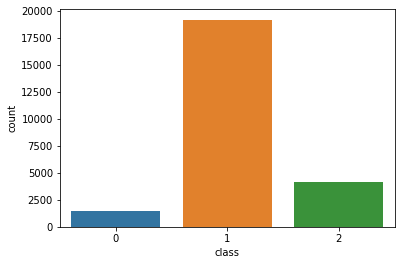

In [57]:
sns.countplot('class',data=dataset)

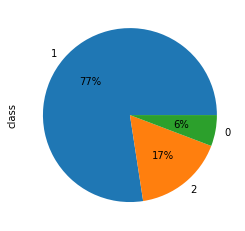

In [58]:
#show percentage dataset
dataset['class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [59]:
#separate tweet and category
tweet = dataset['tweet'].values
categori = dataset['class'].values

In [60]:
categori = tf.keras.utils.to_categorical(categori, 3)

In [61]:
#make sure every review is text
for i in range(len(tweet)):
  tweet[i] = str(tweet[i])

In [62]:
#split train and test data
tweet_train, tweet_test, categori_train, categori_test = train_test_split(tweet, categori, test_size=0.2)

#Feature Extraction

In [63]:
#tokenization
tokenizer = Tokenizer(num_words=1000, oov_token='x')
tokenizer.fit_on_texts(tweet_train) 
tokenizer.fit_on_texts(tweet_test)

In [64]:
#convert sample to sequence
sekuens_latih = tokenizer.texts_to_sequences(tweet_train)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)

In [65]:
#padding
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

#Model

In [66]:
#model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [67]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [68]:
#compile model
model.compile(loss='kl_divergence',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics=['accuracy',tf.keras.metrics.MeanAbsoluteError()])

In [69]:
#training model

mymodel = model.fit(padded_latih, categori_train, epochs=100, batch_size=64, 
                    validation_data=(padded_test, categori_test), 
                    verbose=1)

Epoch 1/100
310/310 [==============================] - 6s 10ms/step - loss: 0.5965 - accuracy: 0.7587 - mean_absolute_error: 0.4912 - val_loss: 0.3965 - val_accuracy: 0.7781 - val_mean_absolute_error: 0.4720
Epoch 2/100
310/310 [==============================] - 3s 8ms/step - loss: 0.1507 - accuracy: 0.7734 - mean_absolute_error: 0.4892 - val_loss: 0.0513 - val_accuracy: 0.7781 - val_mean_absolute_error: 0.5383
Epoch 3/100
310/310 [==============================] - 3s 8ms/step - loss: 0.0388 - accuracy: 0.7734 - mean_absolute_error: 0.5722 - val_loss: 0.0327 - val_accuracy: 0.7781 - val_mean_absolute_error: 0.5909
Epoch 4/100
310/310 [==============================] - 3s 9ms/step - loss: 0.0300 - accuracy: 0.7734 - mean_absolute_error: 0.6003 - val_loss: 0.0278 - val_accuracy: 0.7781 - val_mean_absolute_error: 0.6054
Epoch 5/100
310/310 [==============================] - 3s 9ms/step - loss: 0.0262 - accuracy: 0.7734 - mean_absolute_error: 0.6104 - val_loss: 0.0245 - val_accuracy: 0.778

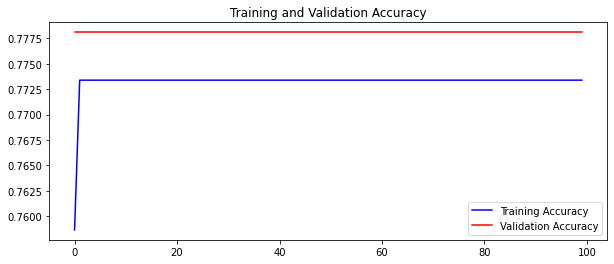

<Figure size 432x288 with 0 Axes>

In [70]:
#plot accuracy
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(epochs, acc, 'b', label='Training Accuracy')
ax.plot(epochs, val_acc, 'r', label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#Prediction

In [71]:
sample = tweet_test[500]
sample_class = categori_test[500]
sample_token = padded_test[500]
print(sample)
print(sample_token)
print(sample_class)

@WendyDavisTexas hey Windy! Does your dildo take out the trash for you? Buzzzzz
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 828 412 828 344  35 828 165  62   6  57
  27   7 828]
[0. 1. 0.]


In [72]:
preds = model.predict(sample_token)
pred_classes = tf.squeeze(tf.cast(preds>0.52, tf.int8))
pred_classes

<tf.Tensor: shape=(75, 3), dtype=int8, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
